* Task is to `predict` the `probability percentage` that a client will purchase a product from the features provided in the dataset that is given

In [1]:
# for mathematical operations
import numpy as np

# for dataframe operations
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# full display of columns and rows
pd.set_option('display.max_column',None,'display.max_colwidth',1000,'display.max_rows',10000)

# lets select a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (18, 8)

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
# Lets import the data
data = pd.read_csv('train.csv')
data.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [3]:
datatest_original = pd.read_csv('test.csv')
datatest = pd.read_csv('test.csv')
datatest.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988$,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,India,Bhubaneshwar,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961$,2541758.2$,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,USA,"Coeur d'Alene, ID",Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433$,3041031.0$,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,USA,"Portland-South Portland, ME",Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952$,1521716.4$,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,India,Bareilly,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835$,2455218.75$,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,USA,"Trenton, NJ",Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [4]:
data.columns

Index(['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource',
       'Internal_rating', 'Success_probability'],
      dtype='object')

In [5]:
datatest.columns

Index(['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource',
       'Internal_rating'],
      dtype='object')

In [6]:
data.shape

(7007, 23)

In [7]:
datatest.shape

(2093, 22)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7007 entries, 0 to 7006
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             7007 non-null   object 
 1   Lead_name              7007 non-null   object 
 2   Industry               7006 non-null   object 
 3   Deal_value             6956 non-null   object 
 4   Weighted_amount        6482 non-null   object 
 5   Date_of_creation       7007 non-null   object 
 6   Pitch                  7007 non-null   object 
 7   Contact_no             7007 non-null   object 
 8   Lead_revenue           7007 non-null   object 
 9   Fund_category          7007 non-null   object 
 10  Geography              6035 non-null   object 
 11  Location               6996 non-null   object 
 12  POC_name               6999 non-null   object 
 13  Designation            7007 non-null   object 
 14  Lead_POC_email         7007 non-null   object 
 15  Hiri

In [9]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             2093 non-null   object 
 1   Lead_name              2093 non-null   object 
 2   Industry               2092 non-null   object 
 3   Deal_value             2088 non-null   object 
 4   Weighted_amount        2033 non-null   object 
 5   Date_of_creation       2093 non-null   object 
 6   Pitch                  2093 non-null   object 
 7   Contact_no             2093 non-null   object 
 8   Lead_revenue           2093 non-null   object 
 9   Fund_category          2093 non-null   object 
 10  Geography              2014 non-null   object 
 11  Location               2090 non-null   object 
 12  POC_name               2091 non-null   object 
 13  Designation            2093 non-null   object 
 14  Lead_POC_email         2093 non-null   object 
 15  Hiri

In [10]:
data.nunique().sort_values()

Pitch                       2
Geography                   2
Level_of_meeting            3
Lead_revenue                3
Lead_source                 4
Fund_category               4
Internal_rating             5
Resource                    6
Designation                10
Last_lead_update           11
Internal_POC               60
Industry                  171
Success_probability       248
Location                  597
Hiring_candidate_role     639
Date_of_creation          777
POC_name                 5261
Weighted_amount          6480
Deal_value               6907
Lead_POC_email           7007
Contact_no               7007
Lead_name                7007
Deal_title               7007
dtype: int64

In [11]:
datatest.nunique().sort_values()

Geography                   2
Pitch                       2
Level_of_meeting            3
Lead_revenue                3
Lead_source                 4
Fund_category               4
Resource                    6
Internal_rating             7
Designation                10
Last_lead_update           11
Internal_POC               60
Industry                  138
Location                  565
Hiring_candidate_role     618
Date_of_creation          720
POC_name                 1745
Weighted_amount          2033
Deal_value               2083
Lead_POC_email           2093
Lead_name                2093
Contact_no               2093
Deal_title               2093
dtype: int64

In [12]:
data.describe()

,Internal_rating,Success_probability
count,7007.000000,7007.000000
mean,3.009562,64.745133
std,1.418666,17.931635
min,1.000000,-5.000000
25%,2.000000,60.600000
50%,3.000000,65.300000
75%,4.000000,69.600000
max,5.000000,107.340000


In [13]:
datatest.describe()

,Internal_rating
count,2093.000000
mean,3.143354
std,4.510451
min,-1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,82.340000


## Data Cleaning

In [14]:
# #Two of the columns has dollar sign. We will be removing them now.
a = data.columns
data[a] = data[a].replace({r'\$':''}, regex = True)

data['Deal_value']=data['Deal_value'].astype('float')
data['Weighted_amount']=data['Weighted_amount'].astype('float')
data.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.7,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,240876.8,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2407926.4,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,468321.4,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [15]:
#Two of the columns has dollar sign. We will be removing them now.
a = datatest.columns
datatest[a] = datatest[a].replace({r'\$':''}, regex = True)
datatest.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,India,Bhubaneshwar,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961,2541758.2,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,USA,"Coeur d'Alene, ID",Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433,3041031.0,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,USA,"Portland-South Portland, ME",Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952,1521716.4,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,India,Bareilly,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835,2455218.75,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,USA,"Trenton, NJ",Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [16]:
# count column-wise null
data.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                51
Weighted_amount          525
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                972
Location                  11
POC_name                   8
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         633
Internal_POC               0
Resource                 149
Internal_rating            0
Success_probability        0
dtype: int64

In [17]:
# count column-wise null
datatest.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                 5
Weighted_amount           60
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                 79
Location                   3
POC_name                   2
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         168
Internal_POC               0
Resource                  14
Internal_rating            0
dtype: int64

In [18]:
# count row-wise null
data.isnull().sum(axis=1)

0       1
1       0
2       0
3       0
4       1
5       0
6       2
7       0
8       0
9       0
10      1
11      0
12      1
13      2
14      0
15      0
16      1
17      1
18      0
19      0
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      1
28      0
29      1
30      0
31      0
32      0
33      1
34      0
35      1
36      0
37      0
38      0
39      1
40      0
41      1
42      0
43      0
44      0
45      0
46      0
47      2
48      1
49      0
50      0
51      1
52      0
53      0
54      0
55      0
56      0
57      1
58      0
59      0
60      0
61      0
62      0
63      0
64      1
65      1
66      2
67      0
68      0
69      1
70      0
71      0
72      0
73      1
74      0
75      1
76      2
77      0
78      0
79      0
80      0
81      0
82      1
83      1
84      0
85      1
86      0
87      0
88      1
89      1
90      1
91      0
92      0
93      0
94      1
95      0
96      0
97      0
98      0
99      0


In [19]:
# count row-wise null
datatest.isnull().sum(axis=1)

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      1
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      1
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      1
44      2
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      1
58      0
59      0
60      0
61      0
62      0
63      0
64      1
65      0
66      0
67      1
68      0
69      1
70      0
71      0
72      0
73      0
74      0
75      1
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      1
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [20]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# fiinding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data

,Missing Ratio
Geography,13.871842
Last_lead_update,9.033823
Weighted_amount,7.492507
Resource,2.126445
Deal_value,0.727844
Location,0.156986
POC_name,0.114172
Industry,0.014271


In [21]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (datatest.isnull().sum() / len(datatest)) * 100

# fiinding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data

,Missing Ratio
Last_lead_update,8.026756
Geography,3.774486
Weighted_amount,2.866699
Resource,0.668896
Deal_value,0.238892
Location,0.143335
POC_name,0.095557
Industry,0.047778


In [22]:
@interact
def correlations(column1 = list(data.select_dtypes('number').columns),
                column2 = list(data.select_dtypes('number').columns[1:])):
    print(f'Correlations: ',{data[column1].corr(data[column2])})

interactive(children=(Dropdown(description='column1', options=('Deal_value', 'Weighted_amount', 'Internal_rati…

In [23]:
# lets check the stats for the missing value columns

@interact
def check(column = list(data.select_dtypes('object').columns)):
    return data[column].value_counts()

interactive(children=(Dropdown(description='column', options=('Deal_title', 'Lead_name', 'Industry', 'Date_of_…

In [24]:
# lets check the stats for the missing value columns

@interact
def check(column = list(datatest.select_dtypes('object').columns)):
    return datatest[column].value_counts()

interactive(children=(Dropdown(description='column', options=('Deal_title', 'Lead_name', 'Industry', 'Deal_val…

###  Check for Skewness

In [25]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'float64'].index

#checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

,skew
Weighted_amount,0.067611
Deal_value,0.012097
Success_probability,-0.453705


In [26]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = datatest.dtypes[datatest.dtypes == 'float64'].index

#checking the skewness in all the numerical features
skewed_feats = datatest[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

,skew
Internal_rating,15.503086


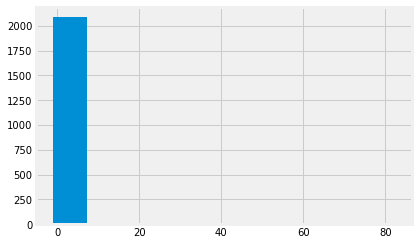

In [27]:
datatest['Internal_rating'].hist()
plt.show()

In [28]:
datatest.drop(['Internal_rating'], axis=1, inplace=True)

### Fill the NaN value

In [29]:
# converting to type 'category'
data['Geography'] = data['Geography'].astype('category')
# imputing NaNs by USA
data.loc[pd.isnull(data['Geography']),['Geography']] = 'USA'

In [30]:
# converting to type 'category'
data['Last_lead_update'] = data['Last_lead_update'].astype('category')
# imputing NaNs by Following up but lead not responding
data.loc[pd.isnull(data['Last_lead_update']),['Last_lead_update']] = 'Following up but lead not responding'

In [31]:
# converting to type 'category'
data['Resource'] = data['Resource'].astype('category')
# imputing NaNs by No
data.loc[pd.isnull(data['Resource']),['Resource']] = 'No'

In [32]:
# converting to type 'category'
data['Location'] = data['Location'].astype('category')
# imputing NaNs by Aurangabad
data.loc[pd.isnull(data['Location']),['Location']] = 'Aurangabad'

In [33]:
# converting to type 'category'
data['POC_name'] = data['POC_name'].astype('category')
# imputing NaNs by pooja
data.loc[pd.isnull(data['POC_name']),['POC_name']] = 'pooja'

In [34]:
# converting to type 'category'
data['Industry'] = data['Industry'].astype('category')
# imputing NaNs by Banks
data.loc[pd.isnull(data['Industry']),['Industry']] = 'Banks'

In [35]:
data['Deal_value'].dtypes

dtype('float64')

In [36]:
data.loc[:,['Deal_value']].describe()

,Deal_value
count,6956.000000
mean,249656.025446
std,144758.854760
min,1551.000000
25%,122427.250000
50%,247101.500000
75%,376816.750000
max,500000.000000


In [37]:
data.loc[:,['Weighted_amount']].describe()

,Weighted_amount
count,6.482000e+03
mean,1.569884e+06
std,9.215792e+05
min,8.708000e+03
25%,7.735794e+05
50%,1.548239e+06
75%,2.358020e+06
max,3.601416e+06


In [38]:
data['Deal_value'] = data['Deal_value'].fillna((data['Deal_value'].mean()))
data['Weighted_amount'] = data['Weighted_amount'].fillna((data['Weighted_amount'].mean()))

In [39]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# fiinding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data

,Missing Ratio


In [40]:
data.Deal_value.quantile([0,0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.00      1551.00
0.10     50174.40
0.20     99135.00
0.25    123293.50
0.50    248796.00
0.70    351793.60
0.80    400991.60
0.90    449771.00
0.95    474666.40
0.99    495395.18
1.00    500000.00
Name: Deal_value, dtype: float64

In [41]:
data.Weighted_amount.quantile([0,0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.00    8.708000e+03
0.10    3.307709e+05
0.20    6.704577e+05
0.25    8.264284e+05
0.50    1.569884e+06
0.70    2.106592e+06
0.80    2.477927e+06
0.90    2.816136e+06
0.95    2.998490e+06
0.99    3.273719e+06
1.00    3.601416e+06
Name: Weighted_amount, dtype: float64

In [42]:
# data['Deal_value_Lable'] = pd.cut(data.Deal_value, [1000, 90000, 300000, 500000], labels = ['Low', 'Medium', 'High'])
# data.drop(['Deal_value'], axis=1, inplace=True)

# data['Weighted_amount_Lable'] = pd.cut(data.Weighted_amount, [8.000000e+03, 7.000000e+05, 2.000000e+06, 4.000000e+06], labels = ['Low', 'Medium', 'High'])
# data.drop(['Weighted_amount'], axis=1, inplace=True)

In [43]:
data.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2.067264e+06,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",No,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,2.408768e+05,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2.407926e+06,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,4.683214e+05,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,1.569884e+06,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [44]:
data.shape

(7007, 23)

### Data Visualization

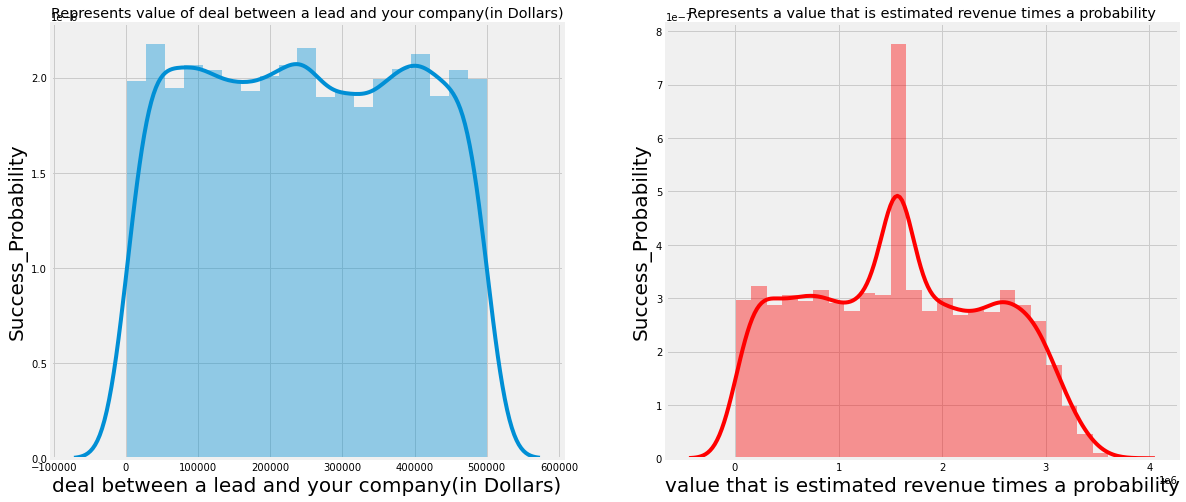

In [45]:
plt.rcParams['figure.figsize'] = (18,8)
plt.subplot(1,2,1)

sns.distplot(data['Deal_value'])
plt.title('Represents value of deal between a lead and your company(in Dollars)')
plt.xlabel('deal between a lead and your company(in Dollars)',fontsize = 20)
plt.ylabel('Success_Probability',fontsize = 20)

plt.subplot(1,2,2)

sns.distplot(data['Weighted_amount'], color = 'red')
plt.title('Represents a value that is estimated revenue times a probability')
plt.xlabel('value that is estimated revenue times a probability',fontsize = 20)
plt.ylabel('Success_Probability',fontsize = 20)
plt.show()

* By looking at the plots,
we can `infer` one thing that value of deal between a lead and your company(in Dollars) is between 1 to 5 million dollar.

The value that is estimated revenue times a probability is less but more in 1.5  

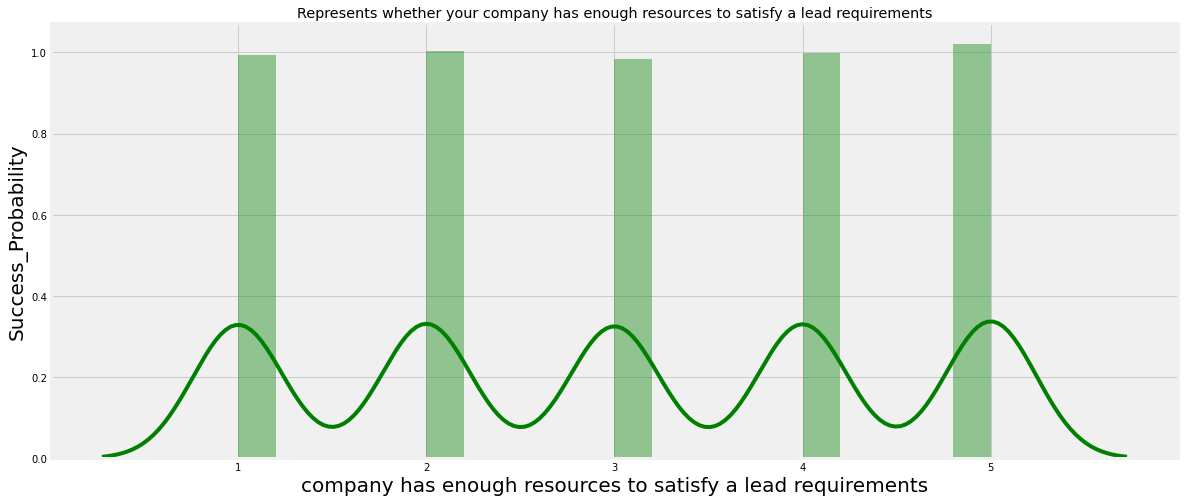

In [46]:
sns.distplot(data['Internal_rating'], color = 'green')
plt.title('Represents whether your company has enough resources to satisfy a lead requirements')
plt.xlabel('company has enough resources to satisfy a lead requirements',fontsize = 20)
plt.ylabel('Success_Probability',fontsize = 20)
plt.show()

* we can clearly see that company has marginal resources

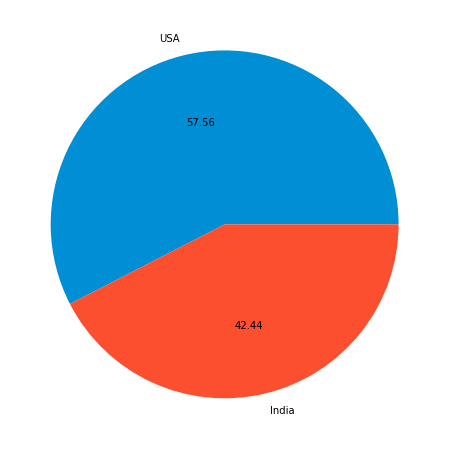

In [47]:
# plot the pie chart
plt.pie(data['Geography'].value_counts(), autopct= '%1.2f', labels = data['Geography'].value_counts().index)
plt.show()

* we can see that more leads where from USA than India

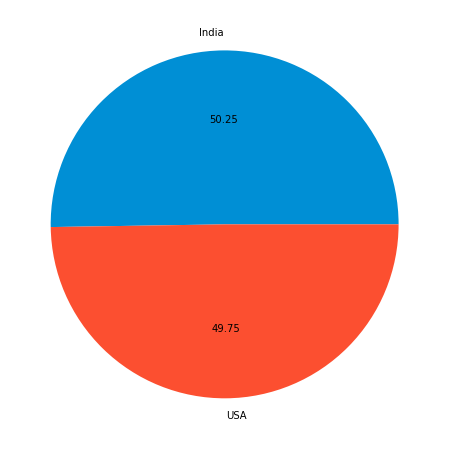

In [48]:
plt.pie(datatest['Geography'].value_counts(), autopct= '%1.2f', labels = datatest['Geography'].value_counts().index)
plt.show()

* But in test dataset more leads where from india than USA

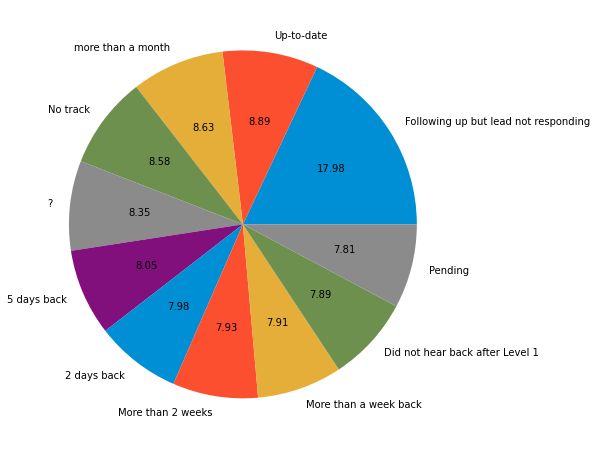

In [49]:
plt.pie(data['Last_lead_update'].value_counts(), autopct= '%1.2f', labels = data['Last_lead_update'].value_counts().index)
plt.show()

* The last communication update with lead and your company were been following up but lead not responding

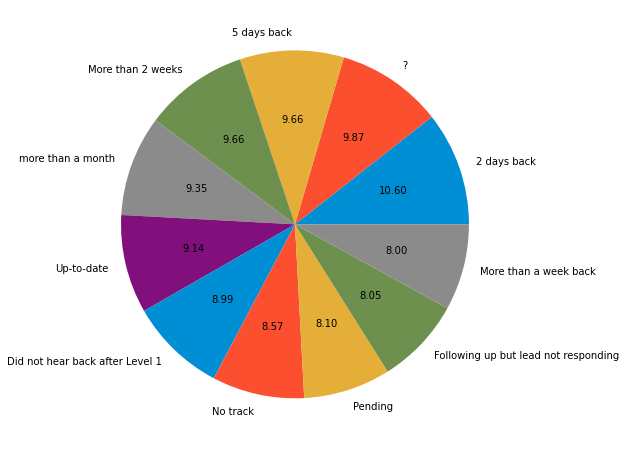

In [50]:
plt.pie(datatest['Last_lead_update'].value_counts(), autopct= '%1.2f', labels = datatest['Last_lead_update'].value_counts().index)
plt.show()

* where as in test dataset 2 days back communication were done with lead and company

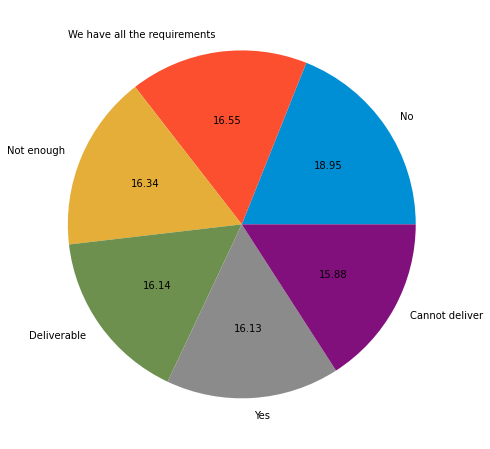

In [51]:
plt.pie(data['Resource'].value_counts(), autopct= '%1.2f', labels = data['Resource'].value_counts().index)
plt.show()

* we can see that having enough resources to satisfy lead's requirements but not able to delivered

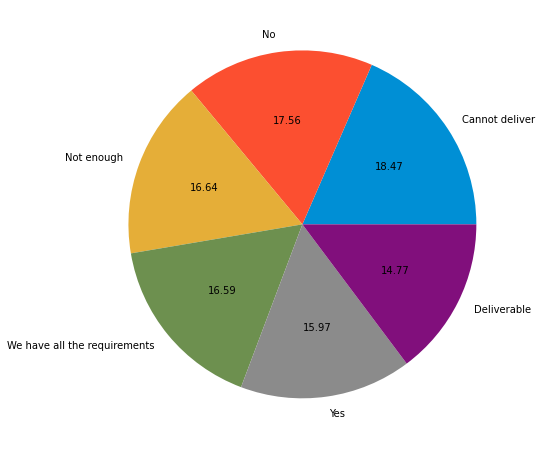

In [52]:
plt.pie(datatest['Resource'].value_counts(), autopct= '%1.2f', labels = datatest['Resource'].value_counts().index)
plt.show()

* Same with test dataset not able to deliver which company make bad impression to satisfy lead

### Fill the NaN value on test dataset

In [53]:
# converting to type 'category'
datatest['Geography'] = datatest['Geography'].astype('category')
# imputing NaNs by India
datatest.loc[pd.isnull(datatest['Geography']),['Geography']] = 'India'

In [54]:
# converting to type 'category'
datatest['Last_lead_update'] = datatest['Last_lead_update'].astype('category')
# imputing NaNs by 2 days back
datatest.loc[pd.isnull(datatest['Last_lead_update']),['Last_lead_update']] = '2 days back'

In [55]:
# converting to type 'category'
datatest['Resource'] = datatest['Resource'].astype('category')
# imputing NaNs by Cannot deliver
datatest.loc[pd.isnull(datatest['Resource']),['Resource']] = 'Cannot deliver'

In [56]:
# converting to type 'category'
datatest['Location'] = datatest['Location'].astype('category')
# imputing NaNs by Moradabad
datatest.loc[pd.isnull(datatest['Location']),['Location']] = 'Moradabad'

In [57]:
# converting to type 'category'
datatest['POC_name'] = datatest['POC_name'].astype('category')
# imputing NaNs by pooja
datatest.loc[pd.isnull(datatest['POC_name']),['POC_name']] = 'pooja'

In [58]:
# converting to type 'category'
datatest['Industry'] = datatest['Industry'].astype('category')
# imputing NaNs by Banks
datatest.loc[pd.isnull(datatest['Industry']),['Industry']] = 'Banks'

In [59]:
datatest['Deal_value'].dtypes

dtype('O')

In [60]:
datatest['Deal_value']=datatest['Deal_value'].astype('float')
datatest['Weighted_amount']=datatest['Weighted_amount'].astype('float')

In [61]:
datatest.loc[:,['Deal_value']].describe()

,Deal_value
count,2088.000000
mean,248052.138889
std,142032.258127
min,2025.000000
25%,126228.250000
50%,251660.000000
75%,372179.500000
max,499392.000000


In [62]:
datatest.loc[:,['Weighted_amount']].describe()

,Weighted_amount
count,2.033000e+03
mean,1.556917e+06
std,9.004054e+05
min,1.316250e+04
25%,7.793451e+05
50%,1.565433e+06
75%,2.336108e+06
max,3.409163e+06


In [63]:
datatest['Deal_value'] = datatest['Deal_value'].fillna((datatest['Deal_value'].mean()))
datatest['Weighted_amount'] = datatest['Weighted_amount'].fillna((datatest['Weighted_amount'].mean()))

In [64]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (datatest.isnull().sum() / len(datatest)) * 100

# fiinding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data

,Missing Ratio


In [65]:
datatest.Deal_value.quantile([0,0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.00      2025.00
0.10     52187.20
0.20     99122.80
0.25    126390.00
0.50    250650.00
0.70    344535.20
0.80    394514.80
0.90    440273.60
0.95    470469.40
0.99    493543.12
1.00    499392.00
Name: Deal_value, dtype: float64

In [66]:
datatest.Weighted_amount.quantile([0,0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.00    1.316250e+04
0.10    3.286336e+05
0.20    6.425341e+05
0.25    8.049900e+05
0.50    1.556917e+06
0.70    2.137292e+06
0.80    2.454088e+06
0.90    2.767062e+06
0.95    2.973657e+06
0.99    3.215384e+06
1.00    3.409163e+06
Name: Weighted_amount, dtype: float64

In [67]:
# datatest['Deal_value_Lable'] = pd.cut(datatest.Deal_value, [1000, 90000, 300000, 500000], labels = ['Low', 'Medium', 'High'])
# datatest.drop(['Deal_value'], axis=1, inplace=True)

# datatest['Weighted_amount_Lable'] = pd.cut(datatest.Weighted_amount, [8.000000e+03, 7.000000e+05, 2.000000e+06, 4.000000e+06], labels = ['Low', 'Medium', 'High'])
# datatest.drop(['Weighted_amount'], axis=1, inplace=True)

In [68]:
datatest.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988.0,1.556917e+06,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,India,Bhubaneshwar,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961.0,2.541758e+06,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,USA,"Coeur d'Alene, ID",Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433.0,3.041031e+06,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,USA,"Portland-South Portland, ME",Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable
3,TitleUS8NA,Durham-Crawford Inc,Music,218952.0,1.521716e+06,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,India,Bareilly,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835.0,2.455219e+06,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,USA,"Trenton, NJ",Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable


In [69]:
data.shape

(7007, 23)

### Dummy Variable

In [70]:
# Get dummy variables for the feature 'Level_of_meeting' and store it in a new variable - 'status'
status = pd.get_dummies(data['Level_of_meeting'], prefix = 'Level_of_meeting', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Level_of_meeting' as we have created the dummies for it
data.drop(['Level_of_meeting'], axis=1, inplace=True)

In [71]:
data = data.rename(columns={'Level_of_meeting_Level 2':'Level_of_meeting_Demo_call','Level_of_meeting_Level 3':'Level_of_meeting_Pre-sales_call'})

In [72]:
data.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,Level_of_meeting_Demo_call,Level_of_meeting_Pre-sales_call
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2.067264e+06,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,No track,"Davis,Sharrice A",No,3,73.6,0,1
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,2.408768e+05,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9,0,0
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2.407926e+06,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,?,"Georgakopoulos,Vasilios T",No,4,68.8,0,0
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,4.683214e+05,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5,1,0
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,1.569884e+06,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Up-to-date,"Thomas,Lori E",No,4,62.4,1,0


In [73]:
# Get dummy variables for the feature 'Pitch' and store it in a new variable - 'status'
status = pd.get_dummies(data['Pitch'], prefix = 'Pitch', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Pitch' as we have created the dummies for it
data.drop(['Pitch'], axis=1, inplace=True)

In [74]:
# Get dummy variables for the feature 'Geography' and store it in a new variable - 'status'
status = pd.get_dummies(data['Geography'], prefix = 'Geography', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Geography' as we have created the dummies for it
data.drop(['Geography'], axis=1, inplace=True)

In [75]:
# Get dummy variables for the feature 'Lead_revenue' and store it in a new variable - 'status'
status = pd.get_dummies(data['Lead_revenue'], prefix = 'Lead_revenue', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Lead_revenue' as we have created the dummies for it
data.drop(['Lead_revenue'], axis=1, inplace=True)

In [76]:
# Get dummy variables for the feature 'Lead_source' and store it in a new variable - 'status'
status = pd.get_dummies(data['Lead_source'], prefix = 'Lead_source', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Lead_source' as we have created the dummies for it
data.drop(['Lead_source'], axis=1, inplace=True)

In [77]:
# Get dummy variables for the feature 'Fund_category' and store it in a new variable - 'status'
status = pd.get_dummies(data['Fund_category'], prefix = 'Fund_category', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Fund_category' as we have created the dummies for it
data.drop(['Fund_category'], axis=1, inplace=True)

In [78]:
# Get dummy variables for the feature 'Resource' and store it in a new variable - 'status'
status = pd.get_dummies(data['Resource'], prefix = 'Resource', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Resource' as we have created the dummies for it
data.drop(['Resource'], axis=1, inplace=True)

In [79]:
# # Get dummy variables for the feature 'Internal_rating' and store it in a new variable - 'status'
# status = pd.get_dummies(data['Internal_rating'], prefix = 'Internal_rating', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# # Add the results to original data dataframe
# data = pd.concat([data, status], axis = 1)

# Drop 'Internal_rating' as we have created the dummies for it
data.drop(['Internal_rating'], axis=1, inplace=True)

In [80]:
# Get dummy variables for the feature 'Designation' and store it in a new variable - 'status'
status = pd.get_dummies(data['Designation'], prefix = 'Designation', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Designation' as we have created the dummies for it
data.drop(['Designation'], axis=1, inplace=True)

In [81]:
# Get dummy variables for the feature 'Last_lead_update' and store it in a new variable - 'status'
status = pd.get_dummies(data['Last_lead_update'], prefix = 'Last_lead_update', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Last_lead_update' as we have created the dummies for it
data.drop(['Last_lead_update'], axis=1, inplace=True)

In [82]:
# Get dummy variables for the feature 'Internal_POC' and store it in a new variable - 'status'
status = pd.get_dummies(data['Internal_POC'], prefix = 'Internal_POC', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Internal_POC' as we have created the dummies for it
data.drop(['Internal_POC'], axis=1, inplace=True)

In [83]:
# # Get dummy variables for the feature 'Industry' and store it in a new variable - 'status'
# status = pd.get_dummies(data['Industry'], prefix = 'Industry', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# # Add the results to original data dataframe
# data = pd.concat([data, status], axis = 1)

# Drop 'Industry' as we have created the dummies for it
data.drop(['Industry'], axis=1, inplace=True)

In [84]:
# # Get dummy variables for the feature 'Location' and store it in a new variable - 'status'
# status = pd.get_dummies(data['Location'], prefix = 'Location', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# # Add the results to original data dataframe
# data = pd.concat([data, status], axis = 1)

# Drop 'Location' as we have created the dummies for it
data.drop(['Location'], axis=1, inplace=True)

In [85]:
# # Get dummy variables for the feature 'Hiring_candidate_role' and store it in a new variable - 'status'
# status = pd.get_dummies(data['Hiring_candidate_role'], prefix = 'Hiring_candidate_role', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# # Add the results to original data dataframe
# data = pd.concat([data, status], axis = 1)

# Drop 'Hiring_candidate_role' as we have created the dummies for it
data.drop(['Hiring_candidate_role'], axis=1, inplace=True)

In [86]:
# # Get dummy variables for the feature 'Deal_value_Lable' and store it in a new variable - 'status'
# status = pd.get_dummies(data['Deal_value_Lable'], prefix = 'Deal_value_Lable', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# # Add the results to original data dataframe
# data = pd.concat([data, status], axis = 1)

# # Drop 'Deal_value_Lable' as we have created the dummies for it
# data.drop(['Deal_value_Lable'], axis=1, inplace=True)

In [87]:
# # Get dummy variables for the feature 'Weighted_amount_Lable' and store it in a new variable - 'status'
# status = pd.get_dummies(data['Weighted_amount_Lable'], prefix = 'Weighted_amount_Lable', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# # Add the results to original data dataframe
# data = pd.concat([data, status], axis = 1)

# # Drop 'Weighted_amount_Lable' as we have created the dummies for it
# data.drop(['Weighted_amount_Lable'], axis=1, inplace=True)

In [88]:
data.shape

(7007, 104)

In [89]:
data.head()

,Deal_title,Lead_name,Deal_value,Weighted_amount,Date_of_creation,Contact_no,POC_name,Lead_POC_email,Success_probability,Level_of_meeting_Demo_call,Level_of_meeting_Pre-sales_call,Pitch_Product_2,Geography_USA,Lead_revenue_50 - 100 Million,Lead_revenue_500 Million - 1 Billion,Lead_source_Marketing Event,Lead_source_Others,Lead_source_Website,Fund_category_Category 2,Fund_category_Category 3,Fund_category_Category 4,Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes,Designation_CEO/Chairman/President,Designation_CEO/Co-Founder/Chairman,Designation_CEO/President,Designation_Chairman/CEO/President,Designation_Chairman/Chief Innovation Officer,Designation_Chief Executive Officer,Designation_Executive Vice President,Designation_SVP/General Counsel,Designation_Vice President / GM (04-present) : VP Sales and Marketing (01-04),Last_lead_update_5 days back,Last_lead_update_?,Last_lead_update_Did not hear back after Level 1,Last_lead_update_Following up but lead not responding,Last_lead_update_More than 2 weeks,Last_lead_update_More than a week back,Last_lead_update_No track,Last_lead_update_Pending,Last_lead_update_Up-to-date,Last_lead_update_more than a month,"Internal_POC_Ali,Mohamed","Internal_POC_Anthony,Katherine D","Internal_POC_Bannister,Joan","Internal_POC_Booker,David L","Internal_POC_Brown,Maxine A","Internal_POC_Carter Sr,Clifton E","Internal_POC_Cash,Tyrone J","Internal_POC_Cashin,Marc C","Internal_POC_Charles,Caleb","Internal_POC_Clavey,Therese A","Internal_POC_Davis,Brian R","Internal_POC_Davis,Sharrice A","Internal_POC_Dimattia,Frank D","Internal_POC_Dunaway,Antoine","Internal_POC_Dyson,William A","Internal_POC_Featherstone,Adrian R","Internal_POC_Gaskins Jr,Franklin D","Internal_POC_Georgakopoulos,Vasilios T","Internal_POC_Gilley,Janine","Internal_POC_Gould,Lisa D","Internal_POC_Green,Ann E","Internal_POC_Green,Candy","Internal_POC_Hameier,Kurt E","Internal_POC_Hanyok,John J","Internal_POC_Hebron,Artenia D","Internal_POC_Heidelberg,Andre D","Internal_POC_Himes,Maurice C","Internal_POC_Houston,Arnold E","Internal_POC_Irizarry,Yolanda","Internal_POC_Jones,Eyvette W","Internal_POC_Jones,Michael L","Internal_POC_Kiepea,Prince A","Internal_POC_Knox,Antonio D","Internal_POC_Leu,Darren L","Internal_POC_Logan,Kevin N","Internal_POC_Mabrey,Kevin C","Internal_POC_Maine,John P","Internal_POC_Massiah,Gerard F","Internal_POC_McKenstry,Loretta A","Internal_POC_Meli,Teresa V","Internal_POC_Moran,Natalie A","Internal_POC_Morsy,Omar A","Internal_POC_Murray,Younetta","Internal_POC_Pappas,Mark S","Internal_POC_Robinson,John C","Internal_POC_Rocks,Michael J","Internal_POC_Ross,Eric L","Internal_POC_Ryker,David","Internal_POC_Salyers,Daniel L","Internal_POC_Shelton,Sidney P","Internal_POC_Smith,Keenan H","Internal_POC_Sutton,Michelle R","Internal_POC_Thomas,Lori E","Internal_POC_Tondeur,Keith D","Internal_POC_Turner,Marlon D","Internal_POC_Ullrich,Rose Anne","Internal_POC_Van Arter,Derrick","Internal_POC_Vickers Jr.,Henry J","Internal_POC_Young,Valerie K"
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",320506.0,2.067264e+06,2020-03-29,607.447.7883,Charlene Werner,charlenewerner@davis.com,73.6,0,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TitleKIW18,Bender PLC LLC,39488.0,2.408768e+05,2019-07-10,892-938-9493,rakhi,terrylogan@bender.com,58.9,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TitleFXSDN,Carter-Henry and Sons,359392.0,2.407926e+06,2019-07-27,538.748.2271,Ariel Hamilton,arielhamilton@carterhenry.com,68.8,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Title

In [90]:
# Lead_POC_email           7007
# Contact_no               7007
# Lead_name                7007
# Deal_title               7007

data.drop(['Lead_POC_email'], axis=1, inplace=True)
data.drop(['Contact_no'], axis=1, inplace=True)
data.drop(['Lead_name'], axis=1, inplace=True)
data.drop(['Deal_title'], axis=1, inplace=True)
data.drop(['Date_of_creation'], axis=1, inplace=True)
data.drop(['POC_name'], axis=1, inplace=True)
# data.drop(['Success_probability'], axis=1, inplace=True)    #this is our target column

In [91]:
data.head()

,Deal_value,Weighted_amount,Success_probability,Level_of_meeting_Demo_call,Level_of_meeting_Pre-sales_call,Pitch_Product_2,Geography_USA,Lead_revenue_50 - 100 Million,Lead_revenue_500 Million - 1 Billion,Lead_source_Marketing Event,Lead_source_Others,Lead_source_Website,Fund_category_Category 2,Fund_category_Category 3,Fund_category_Category 4,Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes,Designation_CEO/Chairman/President,Designation_CEO/Co-Founder/Chairman,Designation_CEO/President,Designation_Chairman/CEO/President,Designation_Chairman/Chief Innovation Officer,Designation_Chief Executive Officer,Designation_Executive Vice President,Designation_SVP/General Counsel,Designation_Vice President / GM (04-present) : VP Sales and Marketing (01-04),Last_lead_update_5 days back,Last_lead_update_?,Last_lead_update_Did not hear back after Level 1,Last_lead_update_Following up but lead not responding,Last_lead_update_More than 2 weeks,Last_lead_update_More than a week back,Last_lead_update_No track,Last_lead_update_Pending,Last_lead_update_Up-to-date,Last_lead_update_more than a month,"Internal_POC_Ali,Mohamed","Internal_POC_Anthony,Katherine D","Internal_POC_Bannister,Joan","Internal_POC_Booker,David L","Internal_POC_Brown,Maxine A","Internal_POC_Carter Sr,Clifton E","Internal_POC_Cash,Tyrone J","Internal_POC_Cashin,Marc C","Internal_POC_Charles,Caleb","Internal_POC_Clavey,Therese A","Internal_POC_Davis,Brian R","Internal_POC_Davis,Sharrice A","Internal_POC_Dimattia,Frank D","Internal_POC_Dunaway,Antoine","Internal_POC_Dyson,William A","Internal_POC_Featherstone,Adrian R","Internal_POC_Gaskins Jr,Franklin D","Internal_POC_Georgakopoulos,Vasilios T","Internal_POC_Gilley,Janine","Internal_POC_Gould,Lisa D","Internal_POC_Green,Ann E","Internal_POC_Green,Candy","Internal_POC_Hameier,Kurt E","Internal_POC_Hanyok,John J","Internal_POC_Hebron,Artenia D","Internal_POC_Heidelberg,Andre D","Internal_POC_Himes,Maurice C","Internal_POC_Houston,Arnold E","Internal_POC_Irizarry,Yolanda","Internal_POC_Jones,Eyvette W","Internal_POC_Jones,Michael L","Internal_POC_Kiepea,Prince A","Internal_POC_Knox,Antonio D","Internal_POC_Leu,Darren L","Internal_POC_Logan,Kevin N","Internal_POC_Mabrey,Kevin C","Internal_POC_Maine,John P","Internal_POC_Massiah,Gerard F","Internal_POC_McKenstry,Loretta A","Internal_POC_Meli,Teresa V","Internal_POC_Moran,Natalie A","Internal_POC_Morsy,Omar A","Internal_POC_Murray,Younetta","Internal_POC_Pappas,Mark S","Internal_POC_Robinson,John C","Internal_POC_Rocks,Michael J","Internal_POC_Ross,Eric L","Internal_POC_Ryker,David","Internal_POC_Salyers,Daniel L","Internal_POC_Shelton,Sidney P","Internal_POC_Smith,Keenan H","Internal_POC_Sutton,Michelle R","Internal_POC_Thomas,Lori E","Internal_POC_Tondeur,Keith D","Internal_POC_Turner,Marlon D","Internal_POC_Ullrich,Rose Anne","Internal_POC_Van Arter,Derrick","Internal_POC_Vickers Jr.,Henry J","Internal_POC_Young,Valerie K"
0,320506.0,2.067264e+06,73.6,0,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,39488.0,2.408768e+05,58.9,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,359392.0,2.407926e+06,68.8,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,76774.0,4.683214e+05,64.5,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,483896.0,1.569884e+06,62.4,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [92]:
data.shape

(7007, 98)

### Dummy Variable for test dataset

In [93]:
# Get dummy variables for the feature 'Level_of_meeting' and store it in a new variable - 'status'
status = pd.get_dummies(datatest['Level_of_meeting'], prefix = 'Level_of_meeting', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original datatest dataframe
datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Level_of_meeting' as we have created the dummies for it
datatest.drop(['Level_of_meeting'], axis=1, inplace=True)

In [94]:
datatest = datatest.rename(columns={'Level_of_meeting_Level 2':'Level_of_meeting_Demo_call','Level_of_meeting_Level 3':'Level_of_meeting_Pre-sales_call'})

In [95]:
# Get dummy variables for the feature 'Pitch' and store it in a new variable - 'status'
status = pd.get_dummies(datatest['Pitch'], prefix = 'Pitch', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original datatest dataframe
datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Pitch' as we have created the dummies for it
datatest.drop(['Pitch'], axis=1, inplace=True)

In [96]:
# Get dummy variables for the feature 'Geography' and store it in a new variable - 'status'
status = pd.get_dummies(datatest['Geography'], prefix = 'Geography', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original datatest dataframe
datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Geography' as we have created the dummies for it
datatest.drop(['Geography'], axis=1, inplace=True)

In [97]:
# Get dummy variables for the feature 'Lead_revenue' and store it in a new variable - 'status'
status = pd.get_dummies(datatest['Lead_revenue'], prefix = 'Lead_revenue', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original datatest dataframe
datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Lead_revenue' as we have created the dummies for it
datatest.drop(['Lead_revenue'], axis=1, inplace=True)

In [98]:
# Get dummy variables for the feature 'Lead_source' and store it in a new variable - 'status'
status = pd.get_dummies(datatest['Lead_source'], prefix = 'Lead_source', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original datatest dataframe
datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Lead_source' as we have created the dummies for it
datatest.drop(['Lead_source'], axis=1, inplace=True)

In [99]:
# Get dummy variables for the feature 'Fund_category' and store it in a new variable - 'status'
status = pd.get_dummies(datatest['Fund_category'], prefix = 'Fund_category', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original datatest dataframe
datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Fund_category' as we have created the dummies for it
datatest.drop(['Fund_category'], axis=1, inplace=True)

In [100]:
# Get dummy variables for the feature 'Resource' and store it in a new variable - 'status'
status = pd.get_dummies(datatest['Resource'], prefix = 'Resource', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original datatest dataframe
datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Resource' as we have created the dummies for it
datatest.drop(['Resource'], axis=1, inplace=True)

In [101]:
# Get dummy variables for the feature 'Designation' and store it in a new variable - 'status'
status = pd.get_dummies(datatest['Designation'], prefix = 'Designation', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original datatest dataframe
datatest= pd.concat([datatest, status], axis = 1)

# Drop 'Designation' as we have created the dummies for it
datatest.drop(['Designation'], axis=1, inplace=True)

In [102]:
# Get dummy variables for the feature 'Last_lead_update' and store it in a new variable - 'status'
status = pd.get_dummies(datatest['Last_lead_update'], prefix = 'Last_lead_update', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original datatest dataframe
datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Last_lead_update' as we have created the dummies for it
datatest.drop(['Last_lead_update'], axis=1, inplace=True)

In [103]:
# Get dummy variables for the feature 'Internal_POC' and store it in a new variable - 'status'
status = pd.get_dummies(datatest['Internal_POC'], prefix = 'Internal_POC', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# Add the results to original datatest dataframe
datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Internal_POC' as we have created the dummies for it
datatest.drop(['Internal_POC'], axis=1, inplace=True)

In [104]:
# # Get dummy variables for the feature 'Industry' and store it in a new variable - 'status'
# status = pd.get_dummies(datatest['Industry'], prefix = 'Industry', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# # Add the results to original datatest dataframe
# datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Industry' as we have created the dummies for it
datatest.drop(['Industry'], axis=1, inplace=True)

In [105]:
# # Get dummy variables for the feature 'Location' and store it in a new variable - 'status'
# status = pd.get_dummies(datatest['Location'], prefix = 'Location', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# # Add the results to original datatest dataframe
# datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Location' as we have created the dummies for it
datatest.drop(['Location'], axis=1, inplace=True)

In [106]:
# # Get dummy variables for the feature 'Hiring_candidate_role' and store it in a new variable - 'status'
# status = pd.get_dummies(datatest['Hiring_candidate_role'], prefix = 'Hiring_candidate_role', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# # Add the results to original datatest dataframe
# datatest = pd.concat([datatest, status], axis = 1)

# Drop 'Hiring_candidate_role' as we have created the dummies for it
datatest.drop(['Hiring_candidate_role'], axis=1, inplace=True)

In [107]:
# # Get dummy variables for the feature 'Deal_value_Lable' and store it in a new variable - 'status'
# status = pd.get_dummies(datatest['Deal_value_Lable'], prefix = 'Deal_value_Lable', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# # Add the results to original datatest dataframe
# datatest = pd.concat([datatest, status], axis = 1)

# # Drop 'Deal_value_Lable' as we have created the dummies for it
# datatest.drop(['Deal_value_Lable'], axis=1, inplace=True)

In [108]:
# # Get dummy variables for the feature 'Weighted_amount_Lable' and store it in a new variable - 'status'
# status = pd.get_dummies(datatest['Weighted_amount_Lable'], prefix = 'Weighted_amount_Lable', drop_first = True)   # we use prefix because to identify rows which have similar name with other column

# # Add the results to original datatest dataframe
# datatest = pd.concat([datatest, status], axis = 1)

# # Drop 'Weighted_amount_Lable' as we have created the dummies for it
# datatest.drop(['Weighted_amount_Lable'], axis=1, inplace=True)

In [109]:
# Lead_POC_email           7007
# Contact_no               7007
# Lead_name                7007
# Deal_title               7007

datatest.drop(['Lead_POC_email'], axis=1, inplace=True)
datatest.drop(['Contact_no'], axis=1, inplace=True)
datatest.drop(['Lead_name'], axis=1, inplace=True)
datatest.drop(['Deal_title'], axis=1, inplace=True)
datatest.drop(['Date_of_creation'], axis=1, inplace=True)
datatest.drop(['POC_name'], axis=1, inplace=True)

In [110]:
datatest.shape

(2093, 97)

In [111]:
datatest.head()

,Deal_value,Weighted_amount,Level_of_meeting_Demo_call,Level_of_meeting_Pre-sales_call,Pitch_Product_2,Geography_USA,Lead_revenue_50 - 100 Million,Lead_revenue_500 Million - 1 Billion,Lead_source_Marketing Event,Lead_source_Others,Lead_source_Website,Fund_category_Category 2,Fund_category_Category 3,Fund_category_Category 4,Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes,Designation_CEO/Chairman/President,Designation_CEO/Co-Founder/Chairman,Designation_CEO/President,Designation_Chairman/CEO/President,Designation_Chairman/Chief Innovation Officer,Designation_Chief Executive Officer,Designation_Executive Vice President,Designation_SVP/General Counsel,Designation_Vice President / GM (04-present) : VP Sales and Marketing (01-04),Last_lead_update_5 days back,Last_lead_update_?,Last_lead_update_Did not hear back after Level 1,Last_lead_update_Following up but lead not responding,Last_lead_update_More than 2 weeks,Last_lead_update_More than a week back,Last_lead_update_No track,Last_lead_update_Pending,Last_lead_update_Up-to-date,Last_lead_update_more than a month,"Internal_POC_Ali,Mohamed","Internal_POC_Anthony,Katherine D","Internal_POC_Bannister,Joan","Internal_POC_Booker,David L","Internal_POC_Brown,Maxine A","Internal_POC_Carter Sr,Clifton E","Internal_POC_Cash,Tyrone J","Internal_POC_Cashin,Marc C","Internal_POC_Charles,Caleb","Internal_POC_Clavey,Therese A","Internal_POC_Davis,Brian R","Internal_POC_Davis,Sharrice A","Internal_POC_Dimattia,Frank D","Internal_POC_Dunaway,Antoine","Internal_POC_Dyson,William A","Internal_POC_Featherstone,Adrian R","Internal_POC_Gaskins Jr,Franklin D","Internal_POC_Georgakopoulos,Vasilios T","Internal_POC_Gilley,Janine","Internal_POC_Gould,Lisa D","Internal_POC_Green,Ann E","Internal_POC_Green,Candy","Internal_POC_Hameier,Kurt E","Internal_POC_Hanyok,John J","Internal_POC_Hebron,Artenia D","Internal_POC_Heidelberg,Andre D","Internal_POC_Himes,Maurice C","Internal_POC_Houston,Arnold E","Internal_POC_Irizarry,Yolanda","Internal_POC_Jones,Eyvette W","Internal_POC_Jones,Michael L","Internal_POC_Kiepea,Prince A","Internal_POC_Knox,Antonio D","Internal_POC_Leu,Darren L","Internal_POC_Logan,Kevin N","Internal_POC_Mabrey,Kevin C","Internal_POC_Maine,John P","Internal_POC_Massiah,Gerard F","Internal_POC_McKenstry,Loretta A","Internal_POC_Meli,Teresa V","Internal_POC_Moran,Natalie A","Internal_POC_Morsy,Omar A","Internal_POC_Murray,Younetta","Internal_POC_Pappas,Mark S","Internal_POC_Robinson,John C","Internal_POC_Rocks,Michael J","Internal_POC_Ross,Eric L","Internal_POC_Ryker,David","Internal_POC_Salyers,Daniel L","Internal_POC_Shelton,Sidney P","Internal_POC_Smith,Keenan H","Internal_POC_Sutton,Michelle R","Internal_POC_Thomas,Lori E","Internal_POC_Tondeur,Keith D","Internal_POC_Turner,Marlon D","Internal_POC_Ullrich,Rose Anne","Internal_POC_Van Arter,Derrick","Internal_POC_Vickers Jr.,Henry J","Internal_POC_Young,Valerie K"
0,200988.0,1.556917e+06,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,409961.0,2.541758e+06,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,434433.0,3.041031e+06,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,218952.0,1.521716e+06,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,392835.0,2.455219e+06,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [112]:
# Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [113]:
from sklearn.preprocessing import LabelEncoder

#coverting the object type columns to cat type
for i in object_cols :
    data[i] = data[i].astype('category')
    datatest[i] = datatest[i].astype('category')
#coverting the categorical columns to numeric
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
    datatest[col] = label_encoder.fit_transform(datatest[col])

In [114]:
data.head()

,Deal_value,Weighted_amount,Success_probability,Level_of_meeting_Demo_call,Level_of_meeting_Pre-sales_call,Pitch_Product_2,Geography_USA,Lead_revenue_50 - 100 Million,Lead_revenue_500 Million - 1 Billion,Lead_source_Marketing Event,Lead_source_Others,Lead_source_Website,Fund_category_Category 2,Fund_category_Category 3,Fund_category_Category 4,Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes,Designation_CEO/Chairman/President,Designation_CEO/Co-Founder/Chairman,Designation_CEO/President,Designation_Chairman/CEO/President,Designation_Chairman/Chief Innovation Officer,Designation_Chief Executive Officer,Designation_Executive Vice President,Designation_SVP/General Counsel,Designation_Vice President / GM (04-present) : VP Sales and Marketing (01-04),Last_lead_update_5 days back,Last_lead_update_?,Last_lead_update_Did not hear back after Level 1,Last_lead_update_Following up but lead not responding,Last_lead_update_More than 2 weeks,Last_lead_update_More than a week back,Last_lead_update_No track,Last_lead_update_Pending,Last_lead_update_Up-to-date,Last_lead_update_more than a month,"Internal_POC_Ali,Mohamed","Internal_POC_Anthony,Katherine D","Internal_POC_Bannister,Joan","Internal_POC_Booker,David L","Internal_POC_Brown,Maxine A","Internal_POC_Carter Sr,Clifton E","Internal_POC_Cash,Tyrone J","Internal_POC_Cashin,Marc C","Internal_POC_Charles,Caleb","Internal_POC_Clavey,Therese A","Internal_POC_Davis,Brian R","Internal_POC_Davis,Sharrice A","Internal_POC_Dimattia,Frank D","Internal_POC_Dunaway,Antoine","Internal_POC_Dyson,William A","Internal_POC_Featherstone,Adrian R","Internal_POC_Gaskins Jr,Franklin D","Internal_POC_Georgakopoulos,Vasilios T","Internal_POC_Gilley,Janine","Internal_POC_Gould,Lisa D","Internal_POC_Green,Ann E","Internal_POC_Green,Candy","Internal_POC_Hameier,Kurt E","Internal_POC_Hanyok,John J","Internal_POC_Hebron,Artenia D","Internal_POC_Heidelberg,Andre D","Internal_POC_Himes,Maurice C","Internal_POC_Houston,Arnold E","Internal_POC_Irizarry,Yolanda","Internal_POC_Jones,Eyvette W","Internal_POC_Jones,Michael L","Internal_POC_Kiepea,Prince A","Internal_POC_Knox,Antonio D","Internal_POC_Leu,Darren L","Internal_POC_Logan,Kevin N","Internal_POC_Mabrey,Kevin C","Internal_POC_Maine,John P","Internal_POC_Massiah,Gerard F","Internal_POC_McKenstry,Loretta A","Internal_POC_Meli,Teresa V","Internal_POC_Moran,Natalie A","Internal_POC_Morsy,Omar A","Internal_POC_Murray,Younetta","Internal_POC_Pappas,Mark S","Internal_POC_Robinson,John C","Internal_POC_Rocks,Michael J","Internal_POC_Ross,Eric L","Internal_POC_Ryker,David","Internal_POC_Salyers,Daniel L","Internal_POC_Shelton,Sidney P","Internal_POC_Smith,Keenan H","Internal_POC_Sutton,Michelle R","Internal_POC_Thomas,Lori E","Internal_POC_Tondeur,Keith D","Internal_POC_Turner,Marlon D","Internal_POC_Ullrich,Rose Anne","Internal_POC_Van Arter,Derrick","Internal_POC_Vickers Jr.,Henry J","Internal_POC_Young,Valerie K"
0,320506.0,2.067264e+06,73.6,0,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,39488.0,2.408768e+05,58.9,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,359392.0,2.407926e+06,68.8,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,76774.0,4.683214e+05,64.5,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,483896.0,1.569884e+06,62.4,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [115]:
data['Success_probability'].describe()

count    7007.000000
mean       64.745133
std        17.931635
min        -5.000000
25%        60.600000
50%        65.300000
75%        69.600000
max       107.340000
Name: Success_probability, dtype: float64

In [116]:
# Probability cannot be more than 100. So, we will be dropping rows having values greater than 100
data.drop(data.loc[data['Success_probability']>100].index, inplace = True)

### Dividing into x and y sets for the moodel building

In [117]:
X = data.drop('Success_probability',axis = 1)
Y = data['Success_probability']

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, random_state = 100)

### Model Building

In [119]:
import xgboost as xg

In [120]:
model_xgb = xg.XGBRegressor(eval_metric='mae')
model_xgb.fit(X_train, Y_train, early_stopping_rounds=20, eval_set=[(X_test, Y_test)], verbose=1)

[0]	validation_0-mae:43.32482
[1]	validation_0-mae:31.99103
[2]	validation_0-mae:24.66228
[3]	validation_0-mae:19.61163
[4]	validation_0-mae:16.07405
[5]	validation_0-mae:13.55389
[6]	validation_0-mae:11.74073
[7]	validation_0-mae:10.55524
[8]	validation_0-mae:9.75730
[9]	validation_0-mae:9.23842
[10]	validation_0-mae:8.85283
[11]	validation_0-mae:8.67376
[12]	validation_0-mae:8.54126
[13]	validation_0-mae:8.42325
[14]	validation_0-mae:8.39176
[15]	validation_0-mae:8.32262
[16]	validation_0-mae:8.32977
[17]	validation_0-mae:8.30375
[18]	validation_0-mae:8.33656
[19]	validation_0-mae:8.33554
[20]	validation_0-mae:8.33797
[21]	validation_0-mae:8.32448
[22]	validation_0-mae:8.32277
[23]	validation_0-mae:8.29945
[24]	validation_0-mae:8.31004
[25]	validation_0-mae:8.33621
[26]	validation_0-mae:8.35443
[27]	validation_0-mae:8.39765
[28]	validation_0-mae:8.44173
[29]	validation_0-mae:8.44698
[30]	validation_0-mae:8.43553
[31]	validation_0-mae:8.46198
[32]	validation_0-mae:8.48518
[33]	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mae', gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [121]:
y_pred=model_xgb.predict(X_test)

In [122]:
from sklearn import metrics
score=max(0,100-np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print(score)

85.06511354094303


In [123]:
# from sklearn.feature_selection import RFE

# model_xgb = xg.XGBRegressor(eval_metric='mae')
# model_xgb.fit(X_train, Y_train, early_stopping_rounds=20, eval_set=[(X_test, Y_test)], verbose=1)

# rfe = RFE(estimator = model_xgb, step =1)
# rfe = rfe.fit(X_train, Y_train)

# print('Optimal number of features :', rfe.n_features_)
# print('Best features :', X_train.columns[rfe.support_])

In [124]:
# print('Ranking :', X_train.columns[rfe.ranking_])

In [125]:
# y_pred=rfe.predict(X_test)

In [126]:
# from sklearn import metrics
# score=max(0,100-np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
# print(score)

In [127]:
data.columns

Index(['Deal_value', 'Weighted_amount', 'Success_probability',
       'Level_of_meeting_Demo_call', 'Level_of_meeting_Pre-sales_call',
       'Pitch_Product_2', 'Geography_USA', 'Lead_revenue_50 - 100 Million',
       'Lead_revenue_500 Million - 1 Billion', 'Lead_source_Marketing Event',
       'Lead_source_Others', 'Lead_source_Website', 'Fund_category_Category 2',
       'Fund_category_Category 3', 'Fund_category_Category 4',
       'Resource_Deliverable', 'Resource_No', 'Resource_Not enough',
       'Resource_We have all the requirements', 'Resource_Yes',
       'Designation_CEO/Chairman/President',
       'Designation_CEO/Co-Founder/Chairman', 'Designation_CEO/President',
       'Designation_Chairman/CEO/President',
       'Designation_Chairman/Chief Innovation Officer',
       'Designation_Chief Executive Officer',
       'Designation_Executive Vice President',
       'Designation_SVP/General Counsel ',
       'Designation_Vice President / GM (04-present) : VP Sales and Marketing 

In [128]:
datatest.columns

Index(['Deal_value', 'Weighted_amount', 'Level_of_meeting_Demo_call',
       'Level_of_meeting_Pre-sales_call', 'Pitch_Product_2', 'Geography_USA',
       'Lead_revenue_50 - 100 Million', 'Lead_revenue_500 Million - 1 Billion',
       'Lead_source_Marketing Event', 'Lead_source_Others',
       'Lead_source_Website', 'Fund_category_Category 2',
       'Fund_category_Category 3', 'Fund_category_Category 4',
       'Resource_Deliverable', 'Resource_No', 'Resource_Not enough',
       'Resource_We have all the requirements', 'Resource_Yes',
       'Designation_CEO/Chairman/President',
       'Designation_CEO/Co-Founder/Chairman', 'Designation_CEO/President',
       'Designation_Chairman/CEO/President',
       'Designation_Chairman/Chief Innovation Officer',
       'Designation_Chief Executive Officer',
       'Designation_Executive Vice President',
       'Designation_SVP/General Counsel ',
       'Designation_Vice President / GM (04-present) : VP Sales and Marketing (01-04)',
       'Last_

In [129]:
datatest.shape

(2093, 97)

In [130]:
data.shape

(6492, 98)

In [131]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mae', gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [132]:
final=model_xgb.predict(datatest)

In [133]:
# datatest['Success_probability']= final
# datatest.to_csv('output.csv')

In [134]:
submit_df  =  pd.DataFrame({'Deal_title':datatest_original['Deal_title'],'Success_probability':final})
submit_df.to_csv('submission1.csv')